<a href="https://colab.research.google.com/github/JeffersonEspinalA/Prueba/blob/main/demo_para_hito_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/lmcanavals/acomplex.git

fatal: destination path 'acomplex' already exists and is not an empty directory.


In [ ]:
from acomplex.graphstuff import adjlShow
import heapq as hq
import numpy as np
import graphviz as gv
import math

In [ ]:
def dijkstra(G, s, e):
  n = len(G)
  visited = [False]*n
  path = [-1]*n
  cost = [math.inf]*n

  cost[s] = 0
  pqueue = [(0, s)]
  while pqueue:
    g, u = hq.heappop(pqueue)
    if u == e:
      break
    if not visited[u]:
      visited[u] = True
      for v, w in G[u]:
        if not visited[v]:
          f = g + w
          if f < cost[v]:
            cost[v] = f
            path[v] = u
            hq.heappush(pqueue, (f, v))
            
  return path, cost

In [ ]:
def spath(path, e, sp):
  if path[e] != -1:
    spath(path, path[e], sp)
  sp.append(e)
  return sp

In [ ]:
%%file 0502.al
1 2 3 2 4 9
0 2 2 1 3 2 5 2
1 1 4 2 6 2
0 2 1 2 5 9 7 3
0 9 2 2 7 8
1 2 3 9 6 7
2 2 5 7 7 3
3 3 4 8 6 3

Overwriting 0502.al


In [ ]:
with open("0502.al") as f:
  G = []
  for line in f:
    nums = [int(x) for x in line.split()]
    G.append([])
    for i in range(0, len(nums), 2):
      G[-1].append((nums[i], nums[i+1]))

for x in G:
  print(x)

[(1, 2), (3, 2), (4, 9)]
[(0, 2), (2, 1), (3, 2), (5, 2)]
[(1, 1), (4, 2), (6, 2)]
[(0, 2), (1, 2), (5, 9), (7, 3)]
[(0, 9), (2, 2), (7, 8)]
[(1, 2), (3, 9), (6, 7)]
[(2, 2), (5, 7), (7, 3)]
[(3, 3), (4, 8), (6, 3)]


[1, 2, 4]
3


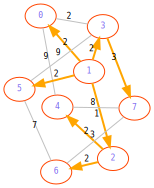

In [ ]:
p = []
sp = []
first = 1
end = 4
path, cost = dijkstra(G, first, end)
print(spath(path, end, sp))
print(cost[end])
adjlShow(G, weighted=True, path=path, layout="neato")